# **Loblaws Analysis**
#### **Group Members:** 
- Devanshi Joshi 
- Aneesh Krishna
- Kosisochukwu Ibe

In [1]:
# Importing the packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
import numpy as np
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC
from scipy.stats.mstats import winsorize

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

| Variable                     | Description                                           |
|------------------------------|-------------------------------------------------------|
| `CustomerID`                   | Unique customer ID                                    |
| `Churn`                        | Churn Flag                                            |
| `Tenure`                       | Tenure of customer in organization                    |
| `PreferredLoginDevice`         | Preferred login device of customer                    |
| `CityTier`                     | City tier                                             |
| `WarehouseToHome`              | Distance in between warehouse to home of customer     |
| `PreferredPaymentMode`         | Preferred payment method of customer                  |
| `Gender`                       | Gender of customer                                    |
| `HourSpendOnApp`               | Number of hours spend on mobile application or website|
| `NumberOfDeviceRegistered`     | Total number of devices is registered on particular customer|
| `PreferedOrderCat`             | Preferred order category of customer in last month    |
| `SatisfactionScore`            | Satisfactory score of customer on service             |
| `MaritalStatus`                | Marital status of customer                            |
| `NumberOfAddress`              | Total number of addresses added on particular customer|
| `Complain`                     | Any complaint has been raised in last month           |
| `OrderAmountHikeFromlastYear`  | Percentage increases in order from last year          |
| `CouponUsed`                   | Total number of coupon has been used in last month    |
| `OrderCount`                   | Total number of orders has been placed in last month  |
| `DaySinceLastOrder`            | Day Since last order by customer                      |
| `CashbackAmount`               | Average cashback in last month                        |


In [2]:
loblawsCsv = pd.read_csv('loblaws.csv')
loblawsCsv.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


#### Understanding the data

In [3]:
loblawsCsv.shape

(5630, 20)

In [4]:
loblawsCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
loblawsCsv.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


Looking into the categorical columns

In [6]:
loblawsCsv['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [7]:
loblawsCsv['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [8]:
loblawsCsv['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [9]:
loblawsCsv['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [10]:
loblawsCsv['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [11]:
loblawsCsv['MaritalStatus'].value_counts() 

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

Based on the above results we can notice the following:
- For **PreferredLoginDevice**: The categories Mobile Phone and Phone represent the same category
- For **PreferedOrderCat**: The categories Mobile and Mobile Phone represent the same category
- For **PreferredPaymentMode**: The categories CC and Credit Card represent the same category additionally same applies for COD and Cash on Delivery

Merging the categories

In [12]:
loblawsCsv.loc[loblawsCsv['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
loblawsCsv.loc[loblawsCsv['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
loblawsCsv.loc[loblawsCsv['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
loblawsCsv.loc[loblawsCsv['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

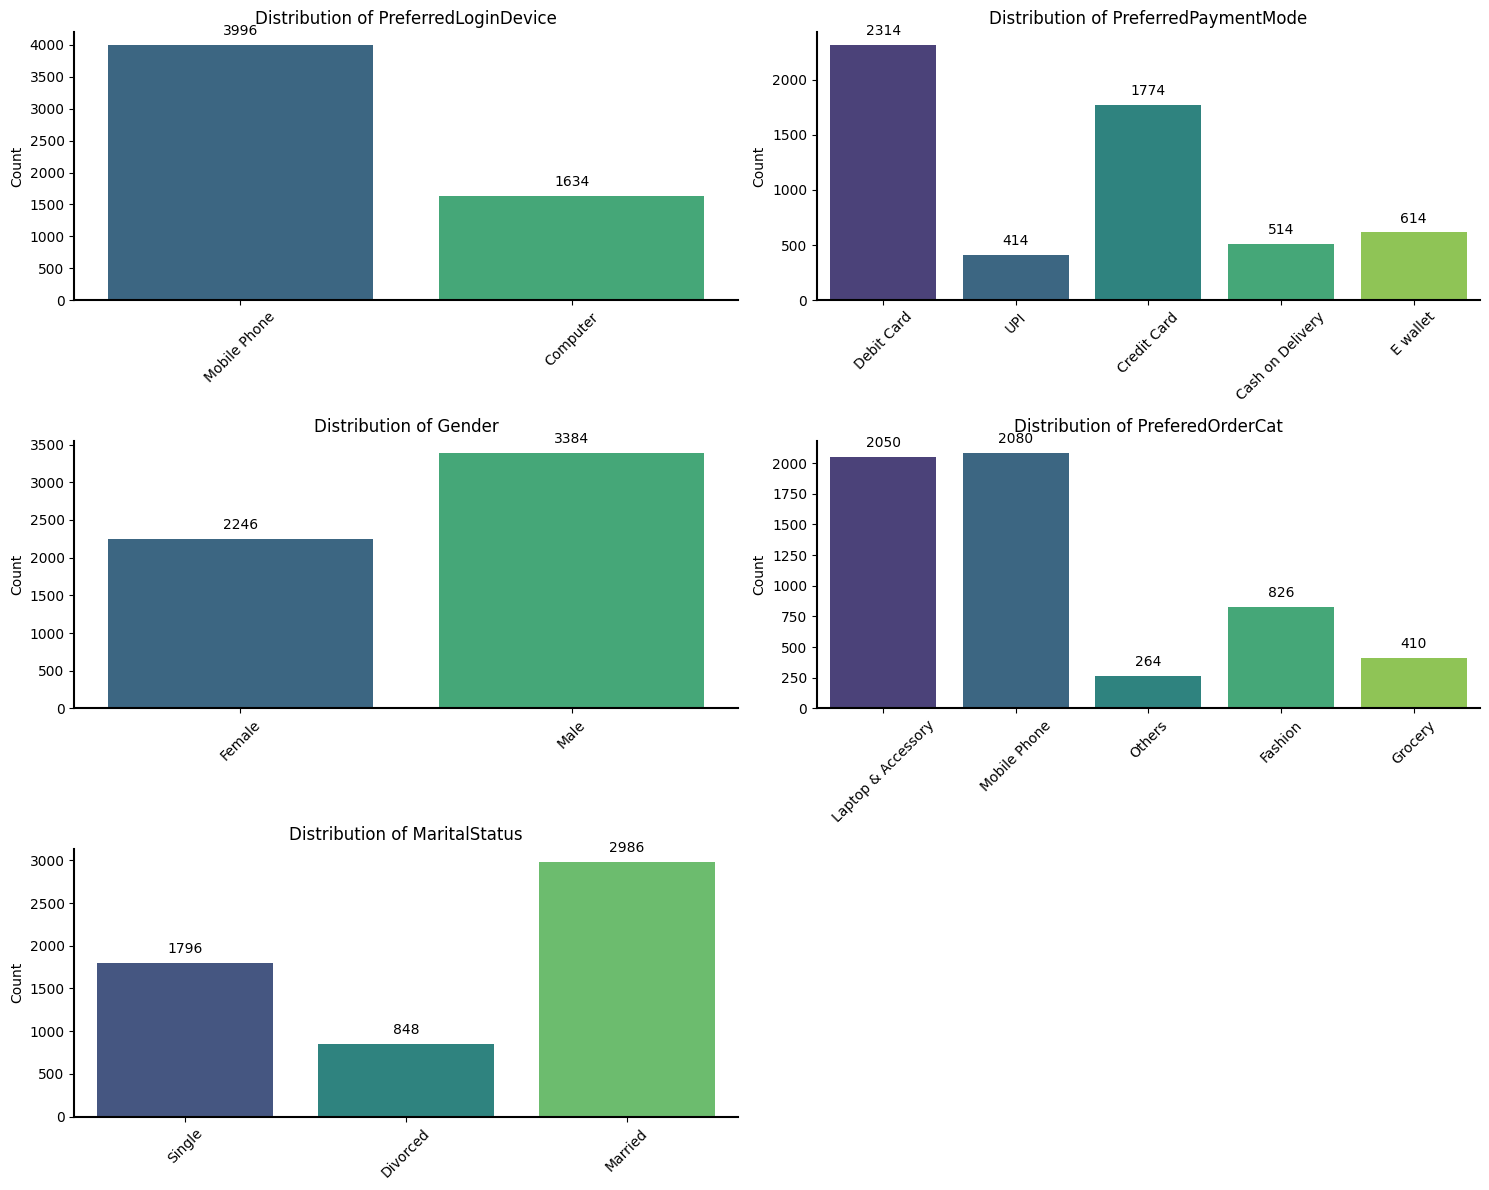

In [13]:
categorical_columns = loblawsCsv.select_dtypes(include=['object', 'category']).columns

n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = sns.countplot(data=loblawsCsv, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_linewidth(1.5)
    axes[i].spines['bottom'].set_linewidth(1.5)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

for j in range(i+1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### EDA

In [14]:
numeric_variables = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

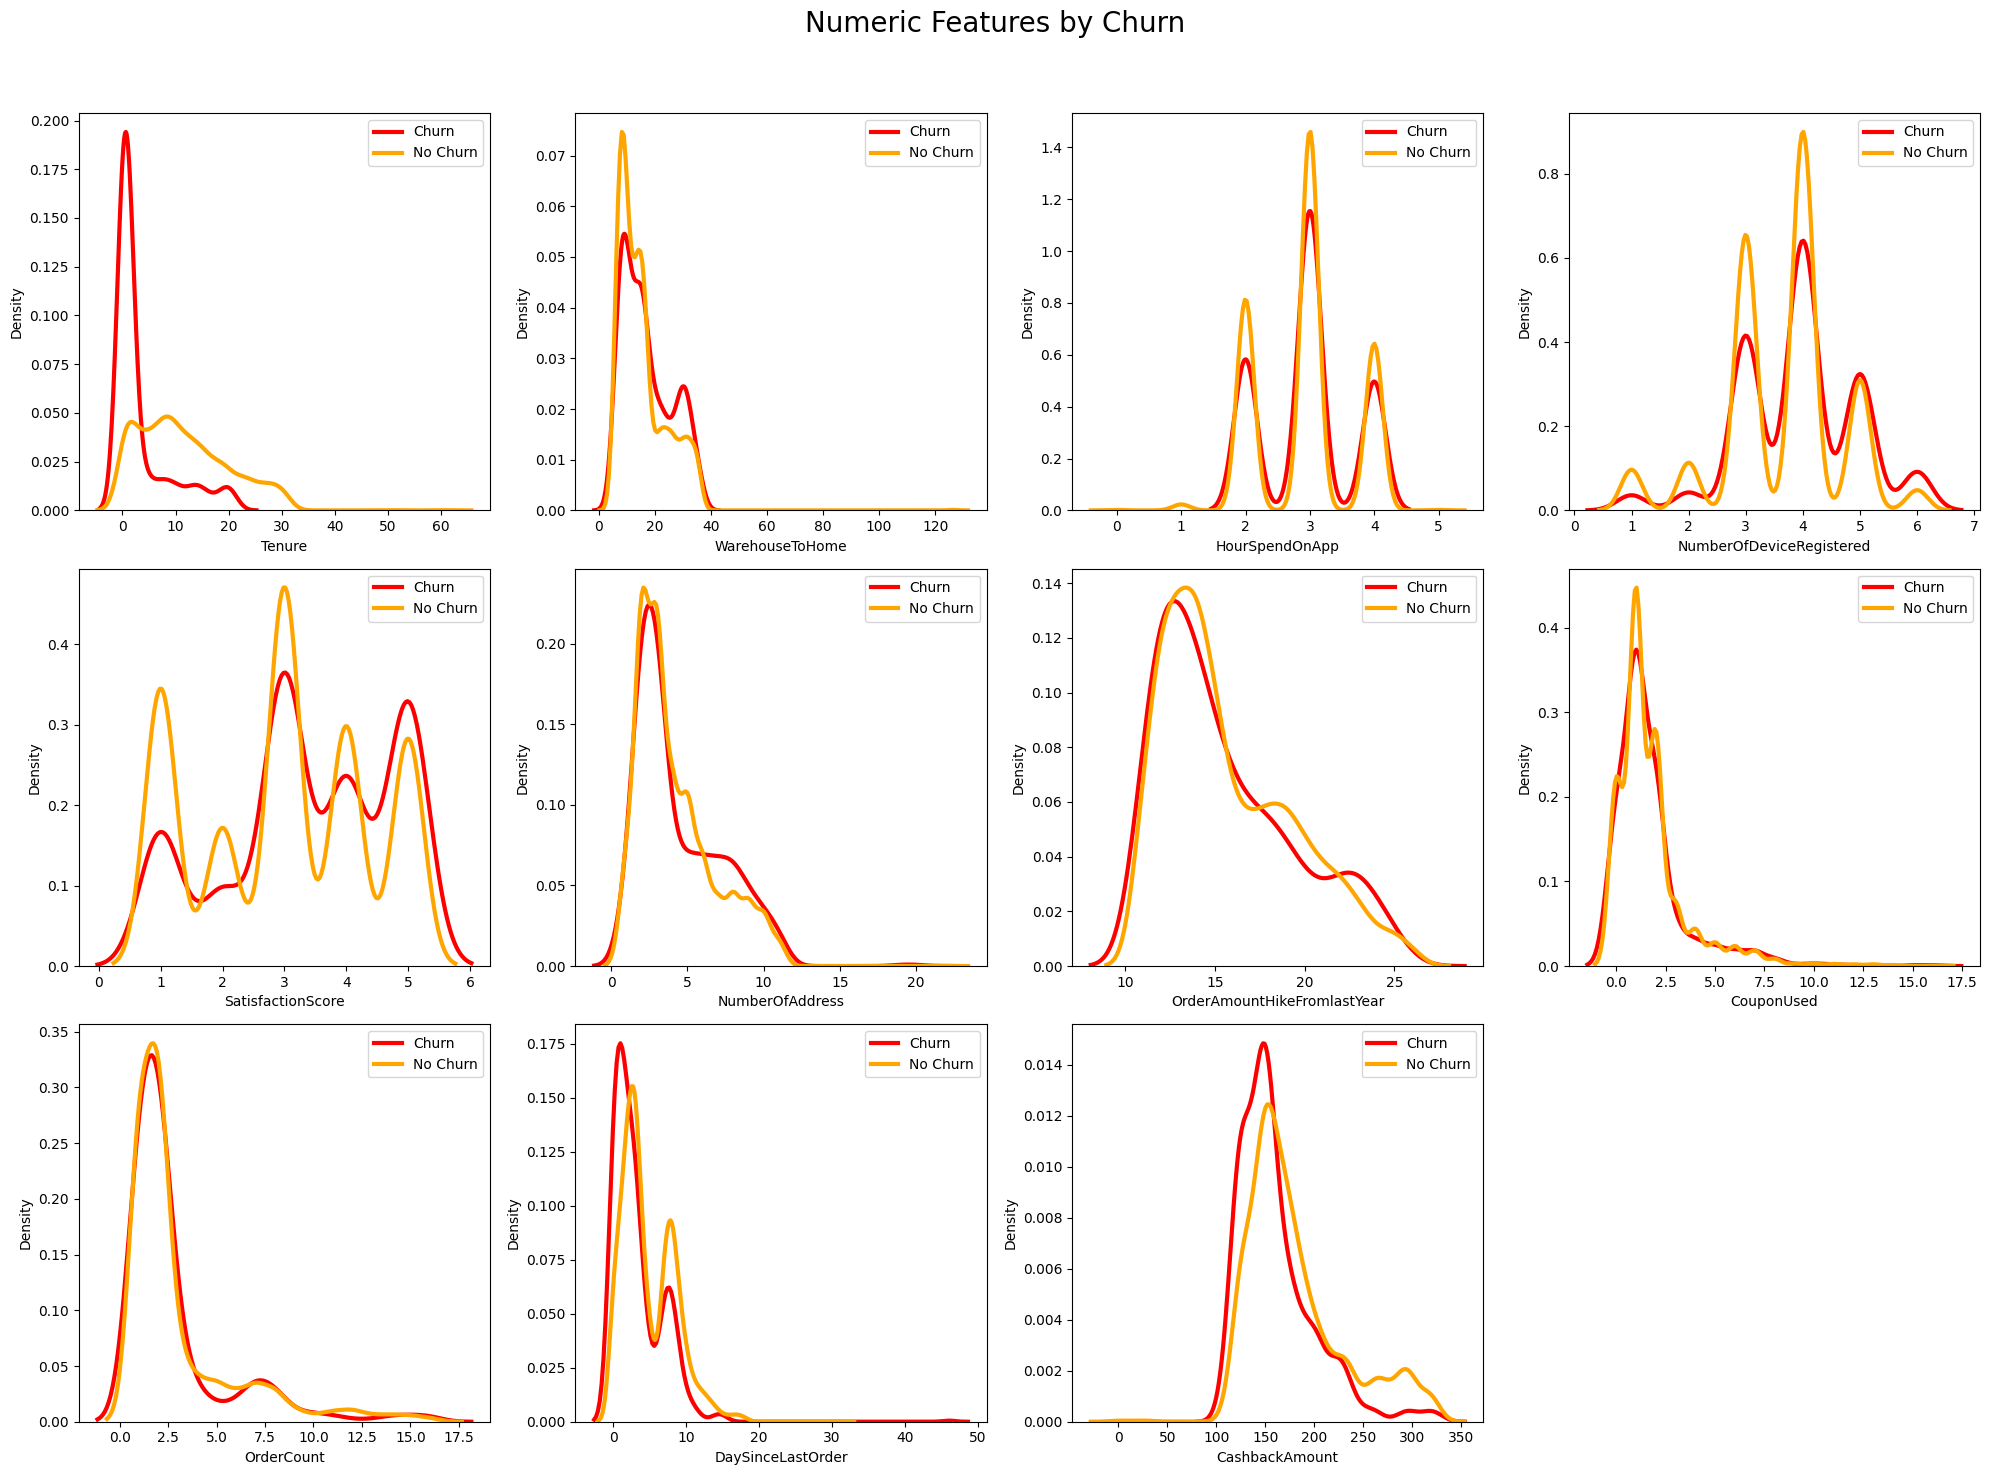

In [15]:
churn = loblawsCsv[loblawsCsv['Churn'] == 1]
noChurn = loblawsCsv[loblawsCsv['Churn'] == 0]
n_cols = 4
n_rows = len(numeric_variables) // n_cols + (len(numeric_variables) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Numeric Features by Churn', fontsize=20)
axes_flat = axes.flatten()

for idx, col in enumerate(numeric_variables):
    sns.kdeplot(churn[col], linewidth=3, label='Churn', ax=axes_flat[idx], color='red')
    sns.kdeplot(noChurn[col], linewidth=3, label='No Churn', ax=axes_flat[idx],color='orange')
    axes_flat[idx].legend(loc='upper right')
for ax in axes_flat[idx+1:]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Customers with a tenure of 0 to 10 appear to churn more frequently than those with longer tenure, indicating that newer customers are at higher risk of leaving.
- There seems to be a significant churn among customers whose distance from the warehouse to home is less than 20 units, suggesting that even with close proximity, there may be factors affecting their satisfaction.
- Time spent on the app is consistently higher for customers who churn, particularly around the 1 to 2-hour mark, implying that despite engagement, there might be aspects of the app experience that contribute to churn.
- The number of devices registered shows a peak density for customers with 1 to 3 devices, for both churned and retained customers, with no clear distinction in churn behavior based on this feature alone.
- Satisfaction scores show that customers with lower scores (around 1 to 3) have higher churn rates, reinforcing the importance of customer satisfaction in retention strategies.
- The number of addresses seems to be not significantly different between the churned and non-churned customers, with the highest density at 1 address.
- There’s a noticeable peak for churn among customers who have had a 0 to 25% hike in their order amounts from last year, suggesting price sensitivity could be a factor in their decision to leave.
- Coupon usage does not display a pronounced difference in the density between churned and retained customers, indicating that coupon use alone might not be a strong predictor of churn.
- Customers are more likely to churn when the days since their last order are fewer, with a sharp peak at around 0 to 10 days.
- For cashback amount, the density peaks around 0 to 50 for both churned and non-churned customers, with churned customers having a slightly higher density at the lower end of the cashback amount, suggesting that cashback might not be a strong incentive to stay.

#### Relationship between gender and churn rate

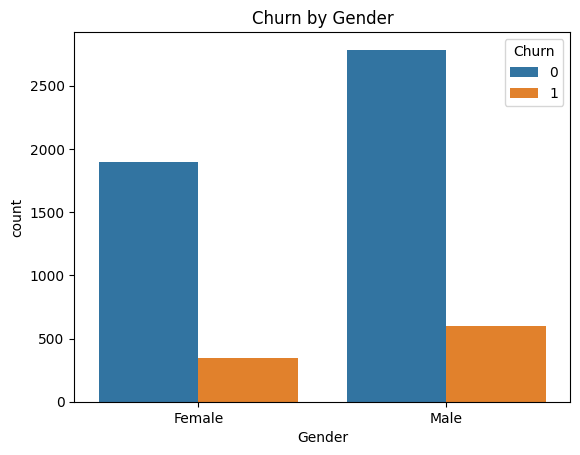

Chi-squared: 4.662908495367532
P-value: 0.030820940334890086
Degrees of freedom: 1
There is a statistically significant relationship between Gender and Churn (p < 0.05).


In [16]:
gender_churn_ct = pd.crosstab(loblawsCsv['Gender'], loblawsCsv['Churn'])
sns.countplot(x='Gender', hue='Churn', data=loblawsCsv)
plt.title('Churn by Gender')
plt.show()

chi2, p, dof, expected = chi2_contingency(gender_churn_ct)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05
if p < alpha:
    print(f"There is a statistically significant relationship between Gender and Churn (p < {alpha}).")
else:
    print(f"There is no statistically significant relationship between Gender and Churn (p >= {alpha}).")

#### Does Maritial Status have a effect on churn rate?

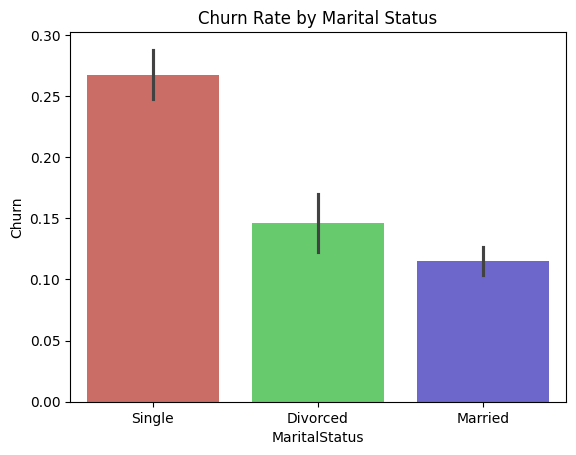

In [17]:
sns.barplot(x='MaritalStatus', y='Churn', data=loblawsCsv, palette='hls')
plt.title('Churn Rate by Marital Status')
plt.show()

preferred order category and churn rate

In [18]:
ordercat_churnrate = pd.DataFrame(loblawsCsv.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()

pie_palette = ['blue', 'orange']  
fig = px.bar(ordercat_churnrate, y='PreferedOrderCat', x='count', 
             color='Gender', barmode='group',
             color_discrete_sequence=pie_palette,
             title="<b>Gender vs Preferred Category", text_auto=True)

fig.update_layout(
    hovermode='y',
    title_font_color="black",
    template="plotly",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5,
    yaxis_title='Preferred Order Category', 
    xaxis_title='Count',
    xaxis=dict(tickformat=',d')  
)
fig.show()

Text(0.5, 1.0, 'Customer Tenure Distribution')

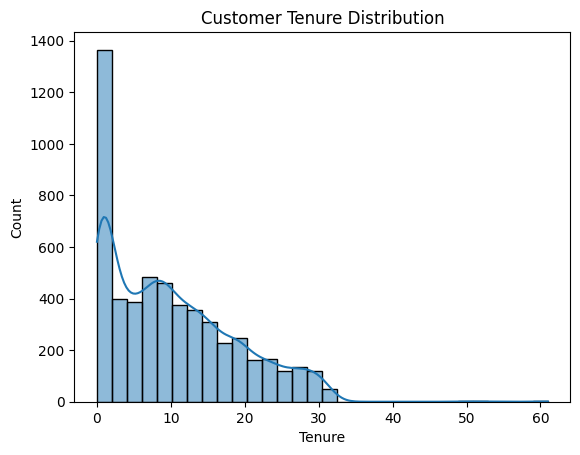

In [19]:
sns.histplot(x='Tenure', data=loblawsCsv, bins=30, kde=True)
plt.title('Customer Tenure Distribution')


Text(0.5, 1.0, 'Average Satisfaction Score by Churn Status')

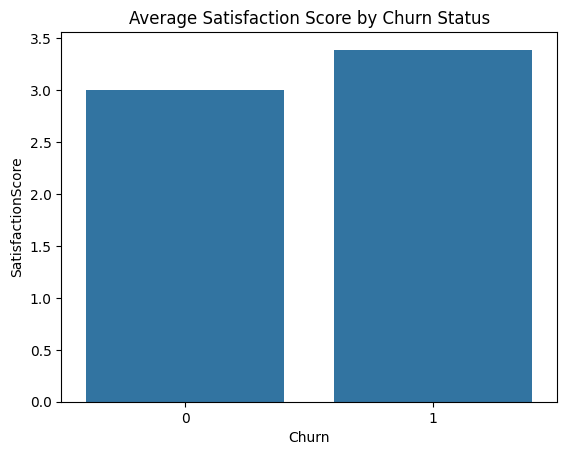

In [20]:
sns.barplot(x='Churn', y='SatisfactionScore', data=loblawsCsv, ci=None)
plt.title('Average Satisfaction Score by Churn Status')


Text(0.5, 1.0, 'Churn by Preferred Login Device')

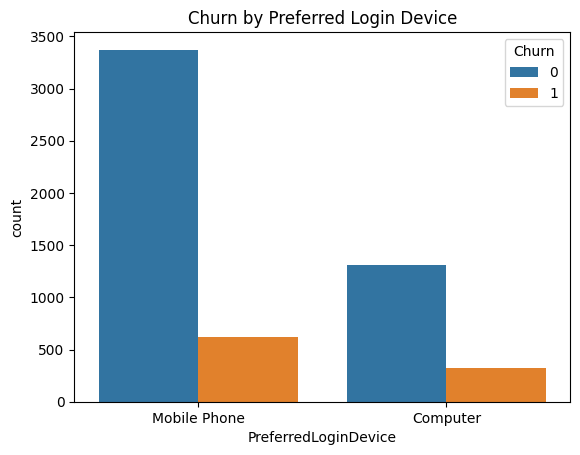

In [21]:
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=loblawsCsv)
plt.title('Churn by Preferred Login Device')

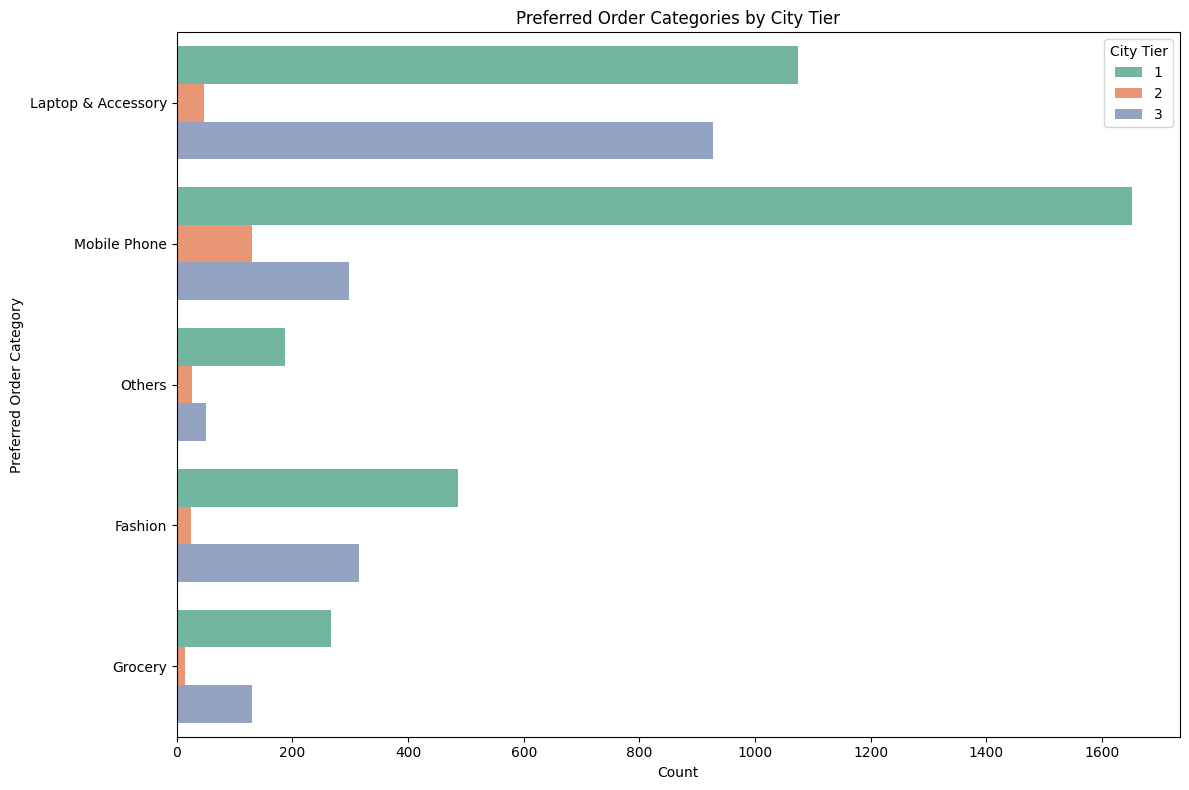

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(y='PreferedOrderCat', hue='CityTier', data=loblawsCsv, palette='Set2')
plt.title('Preferred Order Categories by City Tier')
plt.xlabel('Count')
plt.ylabel('Preferred Order Category')
plt.legend(title='City Tier', loc='upper right')
plt.tight_layout()
plt.show()

#### Pre-processing
Missing values

In [23]:
missing_values = loblawsCsv.isna().sum()
print(missing_values)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [24]:
loblawsCsv['Tenure'] = loblawsCsv['Tenure'].fillna(method = 'bfill')
loblawsCsv['DaySinceLastOrder'] = loblawsCsv['DaySinceLastOrder'].fillna(method = 'bfill')

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
loblawsCsv['WarehouseToHome'] = imputer.fit_transform(loblawsCsv[['WarehouseToHome']])

In [26]:
fill_list = loblawsCsv['HourSpendOnApp'].dropna()
loblawsCsv['HourSpendOnApp'] = loblawsCsv['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(loblawsCsv['HourSpendOnApp'].index))))

In [27]:
column_name = 'OrderAmountHikeFromlastYear'
imputer = SimpleImputer(strategy='mean')
loblawsCsv[column_name] = imputer.fit_transform(loblawsCsv[[column_name]])

In [28]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
loblawsCsv['CouponUsed']=imputer.fit_transform(loblawsCsv[['CouponUsed']])

In [29]:
imputer_2 = KNNImputer(n_neighbors=2)
loblawsCsv['OrderCount']=imputer_2.fit_transform(loblawsCsv[['OrderCount']])

In [30]:
loblawsCsv.drop('CustomerID' , axis = 1 , inplace = True)

#### Outliers

In [31]:
def identify_and_display_outliers(loblawsCsv):
    for col in loblawsCsv.select_dtypes(include='number').columns:  
        Q1 = loblawsCsv[col].quantile(0.25)
        Q3 = loblawsCsv[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers_count = loblawsCsv[(loblawsCsv[col] < lower_bound) | (loblawsCsv[col] > upper_bound)].shape[0]
        
        # Only display if outliers are present
        if outliers_count > 0:
            print(f"Outlier flags for '{col}': {outliers_count} outliers")

# Example usage with your DataFrame
identify_and_display_outliers(loblawsCsv)

Outlier flags for 'Churn': 948 outliers
Outlier flags for 'Tenure': 6 outliers
Outlier flags for 'WarehouseToHome': 2 outliers
Outlier flags for 'HourSpendOnApp': 6 outliers
Outlier flags for 'NumberOfDeviceRegistered': 397 outliers
Outlier flags for 'NumberOfAddress': 4 outliers
Outlier flags for 'OrderAmountHikeFromlastYear': 33 outliers
Outlier flags for 'CouponUsed': 629 outliers
Outlier flags for 'OrderCount': 703 outliers
Outlier flags for 'DaySinceLastOrder': 62 outliers
Outlier flags for 'CashbackAmount': 447 outliers


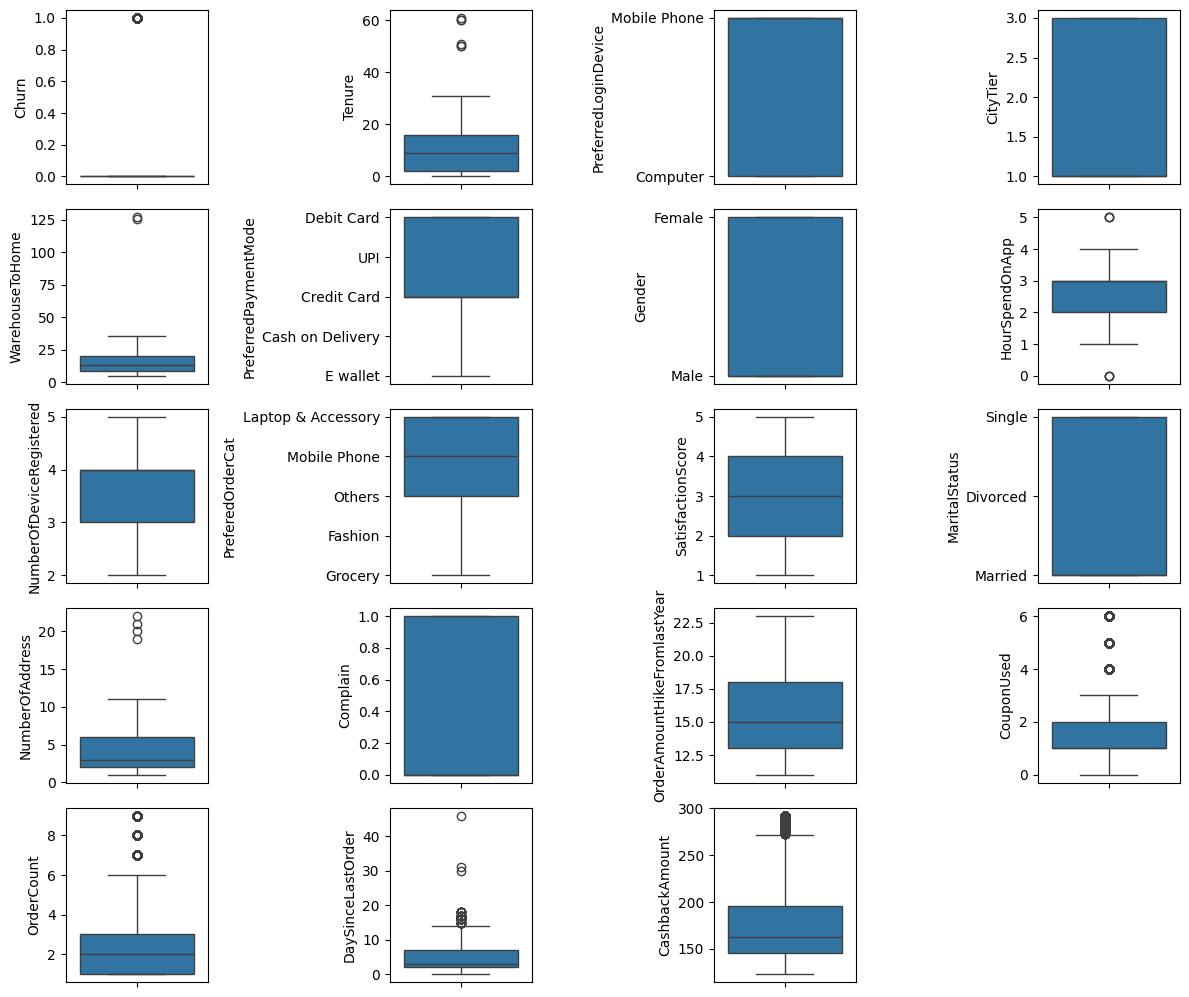

In [32]:
cols_cap = [ 'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']

for col in cols_cap:
    loblawsCsv[col] = winsorize(loblawsCsv[col], limits=[0.05, 0.05])

# Visualize the results after capping
fig = plt.figure(figsize=(12, 18))
for i, col in enumerate(loblawsCsv.columns):
    plt.subplot(9, 4, i+1)
    sns.boxplot(y=loblawsCsv[col])
plt.tight_layout()
plt.show()

- Churn: This is a binary variable, so a box plot might not be the best visualization. The outliers shown are likely due to the binary nature of the data (0 for no churn, 1 for churn).
- Tenure: Most customers have a tenure of around 10 to 30, with some outliers showing very high tenure.
- WarehouseToHome: There's a concentration of values in a lower range with some high outliers, indicating that most customers live within a moderate distance from the warehouse.
- HourSpendOnApp: Hours spent on the app are relatively low for most customers, with some spending significantly more time than average.
- NumberOfDeviceRegistered: Most customers have registered between 2 to 4 devices, with outliers having more.
- NumberOfAddress: The number of addresses is generally low, with some customers having a significantly higher number of addresses.
- OrderCount: Most customers have a low order count, with a few customers having very high order counts.
- DaySinceLastOrder: Customers tend to have ordered recently, with some outliers showing longer times since the last order.
- CashbackAmount: There is a wide range of cashback amounts, with a few very high outliers.

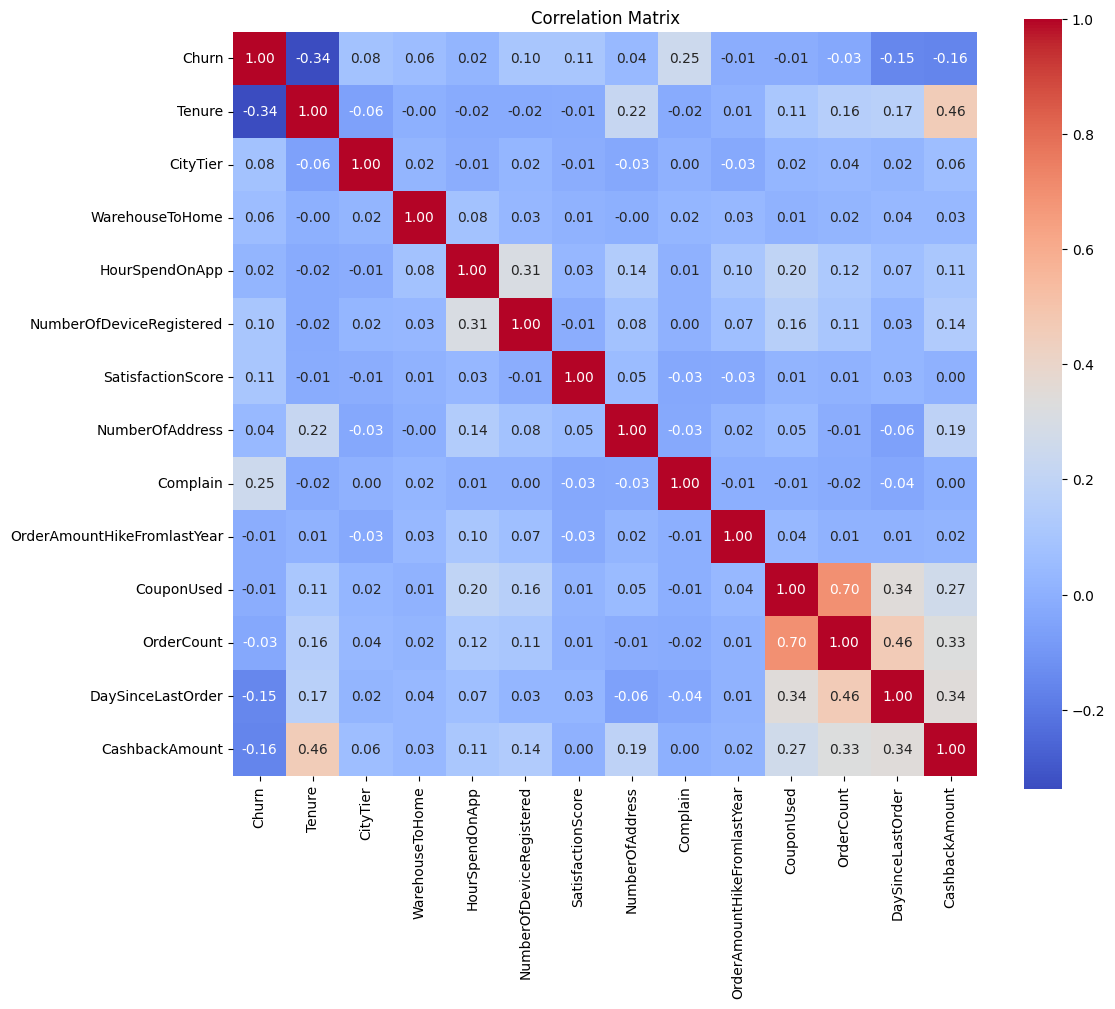

In [33]:
numeric_cols = loblawsCsv.select_dtypes(include=[ 'float64', 'int64']).columns
numeric = loblawsCsv[numeric_cols]
corr_matrix = numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix')
plt.show()

#### One-hot Encoding 

In [34]:
categorical_cols = loblawsCsv.select_dtypes(include=['object']).columns
loblawsCsv_encoded = pd.get_dummies(loblawsCsv, columns=categorical_cols, drop_first=True)

#### Class Imbalance

Text(0.5, 1.0, 'Distribution of Churn')

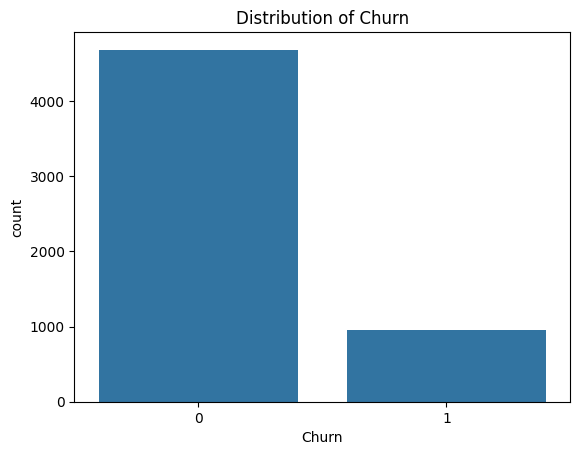

In [35]:
sns.countplot(x='Churn', data=loblawsCsv)
plt.title('Distribution of Churn')

Applying SMOTE due to the presence of class imbalance

In [36]:
X = loblawsCsv_encoded.drop('Churn', axis=1)
Y = loblawsCsv_encoded['Churn']

smt = SMOTETomek(random_state=42)
x_final, y_final = smt.fit_resample(X, Y)

## Feature Extraction

In [40]:
# Feature Extraction: Creating a new feature representing total amount spent
loblawsCsv_encoded['TotalAmountSpent'] = loblawsCsv_encoded['OrderAmountHikeFromlastYear'] * loblawsCsv_encoded['OrderCount']

print("New Features:")
display(loblawsCsv_encoded[['TotalAmountSpent']])

New Features:


,TotalAmountSpent
0,11.0
1,15.0
2,14.0
3,23.0
4,11.0
...,...
5625,36.0
5626,32.0
5627,42.0
5628,30.0


In [45]:
# Re-apply SMOTE due to the presence of the new feature
X_with_new_feature = loblawsCsv_encoded.drop('Churn', axis=1)
Y_with_new_feature = loblawsCsv_encoded['Churn']

smt_with_new_feature = SMOTETomek(random_state=42)
x_final_with_new_feature, y_final_with_new_feature = smt_with_new_feature.fit_resample(X_with_new_feature, Y_with_new_feature)

# Feature Scaling
scaler_with_new_feature = StandardScaler()
scaled_X_with_new_feature = scaler_with_new_feature.fit_transform(x_final_with_new_feature)

In [46]:
# Train-test split
X_train_with_new_feature, X_test_with_new_feature, y_train_with_new_feature, y_test_with_new_feature = train_test_split(scaled_X_with_new_feature, y_final_with_new_feature, test_size=0.2, random_state=42)

In [47]:
# Model Building: Logistic Regression with the new feature
logistic_model_with_new_feature = LogisticRegression()
logistic_model_with_new_feature.fit(X_train_with_new_feature, y_train_with_new_feature)

# Model Evaluation for Logistic Regression
logistic_predictions_with_new_feature = logistic_model_with_new_feature.predict(X_test_with_new_feature)
print("\nLogistic Regression Results with New Feature:")
print(classification_report(y_test_with_new_feature, logistic_predictions_with_new_feature))
print("Confusion Matrix:")
print(confusion_matrix(y_test_with_new_feature, logistic_predictions_with_new_feature))


Logistic Regression Results with New Feature:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       939
           1       0.83      0.85      0.84       934

    accuracy                           0.84      1873
   macro avg       0.84      0.84      0.84      1873
weighted avg       0.84      0.84      0.84      1873

Confusion Matrix:
[[780 159]
 [138 796]]


The Logistic Regression results with the new feature are as follows:

- **Precision**: 
  - Class 0 (No Churn): 0.85
  - Class 1 (Churn): 0.83
  
- **Recall**:
  - Class 0 (No Churn): 0.83
  - Class 1 (Churn): 0.85
  
- **F1-score**:
  - Class 0 (No Churn): 0.84
  - Class 1 (Churn): 0.84

- **Accuracy**: 0.84

The confusion matrix is as follows:

|              | Predicted No Churn | Predicted Churn |
|--------------|---------------------|-----------------|
| Actual No Churn | 780                 | 159             |
| Actual Churn     | 138                 | 796             |

In this case, the model performs reasonably well with an overall accuracy of 0.84. It shows balanced precision, recall, and F1-score for both classes, indicating a good ability to predict both churn and no churn cases.

In [48]:
# Model Building: Random Forest with the new feature
rf_model_with_new_feature = RandomForestClassifier()
rf_model_with_new_feature.fit(X_train_with_new_feature, y_train_with_new_feature)

# Model Evaluation for Random Forest
rf_predictions_with_new_feature = rf_model_with_new_feature.predict(X_test_with_new_feature)
print("\nRandom Forest Results with New Feature:")
print(classification_report(y_test_with_new_feature, rf_predictions_with_new_feature))
print("Confusion Matrix:")
print(confusion_matrix(y_test_with_new_feature, rf_predictions_with_new_feature))


Random Forest Results with New Feature:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       939
           1       0.98      0.99      0.98       934

    accuracy                           0.98      1873
   macro avg       0.98      0.98      0.98      1873
weighted avg       0.98      0.98      0.98      1873

Confusion Matrix:
[[918  21]
 [  8 926]]


The Random Forest results with the new feature are as follows:

- **Precision**: 
  - Class 0 (No Churn): 0.99
  - Class 1 (Churn): 0.98
  
- **Recall**:
  - Class 0 (No Churn): 0.98
  - Class 1 (Churn): 0.99
  
- **F1-score**:
  - Class 0 (No Churn): 0.98
  - Class 1 (Churn): 0.98

- **Accuracy**: 0.98

The confusion matrix is as follows:

|              | Predicted No Churn | Predicted Churn |
|--------------|---------------------|-----------------|
| Actual No Churn | 918                 | 21              |
| Actual Churn     | 8                   | 926             |

The Random Forest model performs exceptionally well with an accuracy of 0.98. It shows high precision, recall, and F1-score for both classes, indicating a strong ability to predict both churn and no churn cases.

In [49]:
# Model Building: Support Vector Machine with the new feature
svm_model_with_new_feature = SVC()
svm_model_with_new_feature.fit(X_train_with_new_feature, y_train_with_new_feature)

# Model Evaluation for Support Vector Machine
svm_predictions_with_new_feature = svm_model_with_new_feature.predict(X_test_with_new_feature)
print("\nSupport Vector Machine Results with New Feature:")
print(classification_report(y_test_with_new_feature, svm_predictions_with_new_feature))
print("Confusion Matrix:")
print(confusion_matrix(y_test_with_new_feature, svm_predictions_with_new_feature))


Support Vector Machine Results with New Feature:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       939
           1       0.94      0.94      0.94       934

    accuracy                           0.94      1873
   macro avg       0.94      0.94      0.94      1873
weighted avg       0.94      0.94      0.94      1873

Confusion Matrix:
[[880  59]
 [ 58 876]]


The Support Vector Machine results with the new feature are as follows:

- **Precision**: 
  - Class 0 (No Churn): 0.94
  - Class 1 (Churn): 0.94
  
- **Recall**:
  - Class 0 (No Churn): 0.94
  - Class 1 (Churn): 0.94
  
- **F1-score**:
  - Class 0 (No Churn): 0.94
  - Class 1 (Churn): 0.94

- **Accuracy**: 0.94

The confusion matrix is as follows:

|              | Predicted No Churn | Predicted Churn |
|--------------|---------------------|-----------------|
| Actual No Churn | 880                 | 59              |
| Actual Churn     | 58                  | 876             |

The Support Vector Machine model also performs well with an accuracy of 0.94. It shows high precision, recall, and F1-score for both classes, indicating a strong ability to predict both churn and no churn cases.

Based on the results of the three models:

1. **Logistic Regression**:
   - Achieved an accuracy of 0.84 with balanced precision, recall, and F1-score for both churn and no churn cases.
   - It performs reasonably well, but there is room for improvement compared to the other models.

2. **Random Forest**:
   - Achieved an exceptional accuracy of 0.98 with high precision, recall, and F1-score for both churn and no churn cases.
   - It outperforms Logistic Regression significantly, indicating that the ensemble approach of Random Forest is more effective in this scenario.

3. **Support Vector Machine (SVM)**:
   - Achieved an accuracy of 0.94 with high precision, recall, and F1-score for both churn and no churn cases.
   - It performs slightly better than Logistic Regression but not as well as Random Forest.

**Conclusion**:
- Random Forest appears to be the best model for this classification task, given its superior performance in terms of accuracy and overall evaluation metrics.
- Logistic Regression and SVM also perform reasonably well, but their performance is overshadowed by the remarkable accuracy achieved by Random Forest.
- Therefore, We would recommend deploying the Random Forest model for predicting customer churn in this scenario.